In [3]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
%matplotlib inline

Download a MaNGA data cube:
https://data.sdss.org/sas/dr13/manga/spectro/redux/v1_5_4/7443/stack/manga-7443-12703-LOGCUBE.fits.gz

In [20]:
cube = fits.open('manga-7443-12703-LOGCUBE.fits.gz')

## Read in data

Read in FLUX (spectra), IVAR (inverse variance of the spectra), and MASK (data quality flags) arrays. Reorder these arrays to be (x, y, wavelength). In this case, (72, 72, 4563)


In [21]:
flux = np.transpose(cube['FLUX'].data, axes=(2, 1, 0))
ivar = np.transpose(cube['IVAR'].data, axes=(2, 1, 0))
mask = np.transpose(cube['MASK'].data, axes=(2, 1, 0))

Read in wavelength array (observed wavelengths) and the metadata of the FLUX array:

In [22]:
wave = cube['WAVE'].data
flux_header = cube['FLUX'].header

Find the coordinates (within the array) of the central "spaxel" (spatial pixel):

In [23]:
x_center = np.int(flux_header['CRPIX1']) - 1
y_center = np.int(flux_header['CRPIX2']) - 1

Plot the spectrum of the central spaxel:

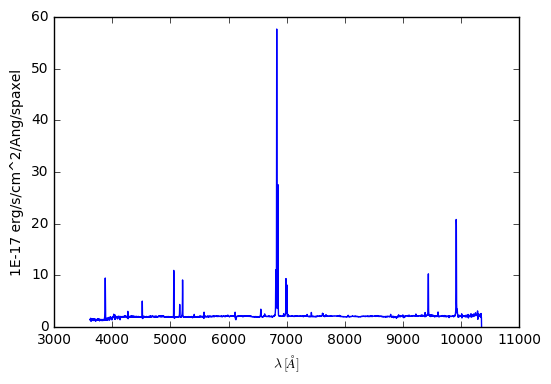

In [25]:
plt.plot(wave, flux[x_center, y_center])
plt.xlabel('$\lambda \, [\AA]$')
plt.ylabel(flux_header['BUNIT'])